### Correlation Analysis Between Prices and News Sentiment

### References

**Correlation Analysis in Python**
   - Tutorial: [Understanding the Basics of Correlation in Python](https://realpython.com/numpy-scipy-pandas-correlation-python/) (Accessed on April 3, 2024)
     - Reference: Real Python. "Understanding the Basics of Correlation in Python.


The following code prepares stock price data for analysis. It loads the stock price data, adds lagged features to it, and aggregates it to weekly frequency, selecting the last observation of each week. 

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../..")
from utils.StockPricesProcess import load_prices_df, add_lags

# defining the path to the stock prices data and the date range
df_path = "../../data/stock_prices/yfinance/AAPL_prices.csv"
start_date_string = "2022-01-01"
end_date_string = "2022-12-30"

# Load stock prices and add lags using functions from StockPricesProcess.py
stock_data = load_prices_df(path=df_path, start_date_string=start_date_string, end_date_string=end_date_string)
stock_data = add_lags(stock_data=stock_data.copy(), numLags=3)

stock_data.head(2)


,Open,High,Low,Close,Volume,Close_Lag1,Close_Lag2,Close_Lag3
Date,,,,,,,,
2022-01-03 05:00:00+00:00,175.597058,180.583650,175.478569,179.724564,104487900,179.724564,179.724564,179.724564
2022-01-04 05:00:00+00:00,180.336790,180.642895,176.870854,177.443573,99310400,179.724564,179.724564,179.724564


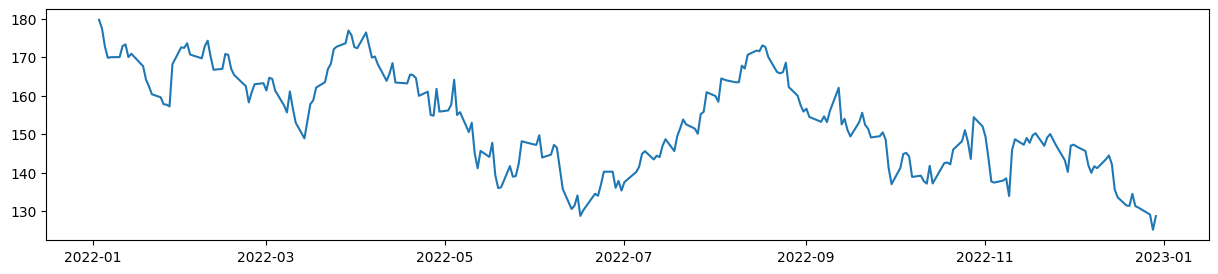

In [3]:
plt.figure(figsize=(15, 3))
plt.plot(stock_data.index, stock_data['Close'],)

We import the function load_news_df() from a utility module called NewsProcessing.py. We then define the path to a CSV file containing financial news data related to a specific stock (AAPL), and the date range. The function load_news_df() is then used to load the news data from the specified path within the given date range.


In [4]:
from utils.NewsProcessing import load_news_df

path = "../../data/financial_news/stock_news_api/financial_news_data_stocknewsapi_AAPL.csv"
news_data = load_news_df(path=path, start_date_string=start_date_string, end_date_string=end_date_string)

news_data.head(2)    


d:\University Stuff\Final Year Project\oxe002\correlation_analysis\correlation_analysis_financial_news\../..\utils\NewsProcessing.py:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  news_data["Date"] = pd.to_datetime(news_data["date"], format="%a, %d %b %Y %H:%M:%S %z")


,date,title,text,source,url,type,sentiment,Date,concat_text
7,"Thu, 29 Dec 2022 17:04:47 -0500","I traded Apple horribly this year, says Virtus...","Joe Terranova, Virtus Investment Partners chie...",CNBC Television,https://www.youtube.com/watch?v=bgvRejqsL-Q,Video,Negative,2022-12-29,"Joe Terranova, Virtus Investment Partners chie..."
8,"Thu, 29 Dec 2022 15:49:39 -0500",The Reasons Why I'm A Scale-Down Buyer Of Appl...,An over 26% loss in 2022 with one day to go. A...,Seeking Alpha,https://seekingalpha.com/article/4566979-a-sca...,Article,Positive,2022-12-29,An over 26% loss in 2022 with one day to go. A...


We analyze financial news data by computing sentiment scores and labels for each news item. We then aggregate the data by date, selecting the most frequent sentiment label and computing the mean sentiment score for each date.


In [5]:
import sys
sys.path.append('../..')
from utils.SentimentAnalysis import get_vader_sentiment_score

news_data["sentiment_score"] = news_data["concat_text"].apply(get_vader_sentiment_score)
news_data_aggregated_score = news_data.groupby("Date")["sentiment_score"].mean().reset_index()
news_data_aggregated_score.head(2)

c:\Users\omare\.conda\envs\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omare\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omare\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Date,sentiment_score
0,2022-01-01,0.430000
1,2022-01-02,0.767067


In [6]:
stock_data["Date"] = stock_data.index
stock_data.head(2)

,Open,High,Low,Close,Volume,Close_Lag1,Close_Lag2,Close_Lag3,Date
Date,,,,,,,,,
2022-01-03 05:00:00+00:00,175.597058,180.583650,175.478569,179.724564,104487900,179.724564,179.724564,179.724564,2022-01-03 05:00:00+00:00
2022-01-04 05:00:00+00:00,180.336790,180.642895,176.870854,177.443573,99310400,179.724564,179.724564,179.724564,2022-01-04 05:00:00+00:00


We prepare data for correlation analysis between stock prices and sentiment scores. Extract the 'Close' prices and 'sentiment_score' from the previously computed weekly dataframes and merge them into a single dataframe. Then, calculate the correlation between these two variables.


In [7]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'], utc=True).dt.date
stock_data.reset_index(drop=True, inplace=True)
news_data_aggregated_score['Date'] = pd.to_datetime(news_data_aggregated_score['Date'], utc=True).dt.date

# Merging stock_data and news_data_aggregated_score DataFrames based on the 'Date' column, using left join
merged_data = pd.merge(stock_data, news_data_aggregated_score, on="Date", how="left")
merged_data.set_index("Date", inplace=True) # Setting the 'Date' column as the index of merged_data DataFrame


nan_values = merged_data.isna().sum()
merged_data.head(2)

,Open,High,Low,Close,Volume,Close_Lag1,Close_Lag2,Close_Lag3,sentiment_score
Date,,,,,,,,,
2022-01-03,175.597058,180.583650,175.478569,179.724564,104487900,179.724564,179.724564,179.724564,0.346823
2022-01-04,180.336790,180.642895,176.870854,177.443573,99310400,179.724564,179.724564,179.724564,0.299187


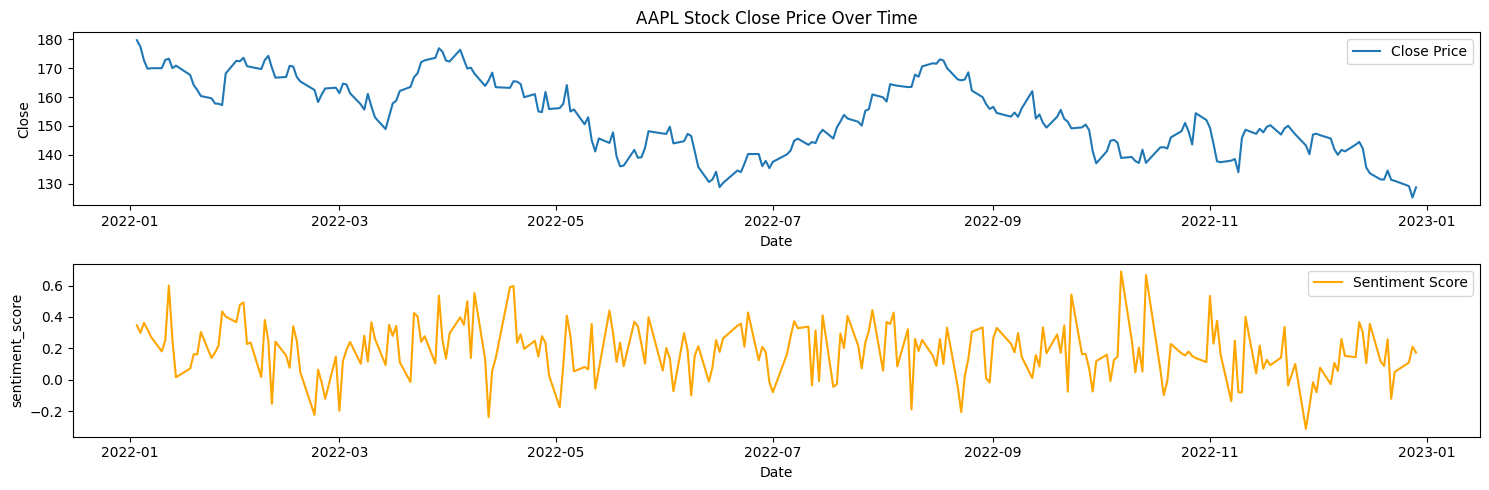

In [8]:
import seaborn as sns

plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
sns.lineplot(x=merged_data.index, y=merged_data["Close"], label="Close Price")
plt.title("AAPL Stock Close Price Over Time")
plt.subplot(2, 1, 2)
sns.lineplot(x=merged_data.index, y=merged_data["sentiment_score"], label="Sentiment Score", color="orange")
plt.tight_layout()
plt.show()

In [10]:
from scipy.stats import pearsonr, t
import numpy as np

time_lags = [-9, -7, -5, -3, -1, 0, 1, 3, 5, 7, 9]

# Lists to store results
coefficients = []
standard_errors = []
p_values = []
t_scores = []

for lag in time_lags:
    lag_column_name = f'Sentiment_Lag_{lag}'
    merged_data[lag_column_name] = merged_data['sentiment_score'].shift(lag)
    correlation_data = merged_data[[lag_column_name]].join(merged_data['Close']).dropna()
    
    # Calculate Pearson correlation coefficient, p-value, and t-score
    correlation, p_value = pearsonr(correlation_data[lag_column_name], correlation_data['Close'])
    n = correlation_data.shape[0] 
    se = np.sqrt((1 - correlation**2) / (n - 2))
    t_score = correlation / se  # Calculate t-score
    
    coefficients.append(round(correlation, 4))
    standard_errors.append(round(se, 4))
    p_values.append(round(p_value, 4))
    t_scores.append(round(t_score, 4))

# Print results
print("Pearson Coefficients, Standard Errors, P-values, and t-scores for Sentiment Sources and AAPL Stock Price Changes:")
print("Sentiment Source\tTime Lag\tCoef.\tSE\tP-val\tt-score")
for i, lag in enumerate(time_lags):
    print(f"Financial News\t\t{lag}\t\t{coefficients[i]}\t{standard_errors[i]}\t{p_values[i]}\t{t_scores[i]}")


Pearson Coefficients, Standard Errors, P-values, and t-scores for Sentiment Sources and AAPL Stock Price Changes:
Sentiment Source	Time Lag	Coef.	SE	P-val	t-score
Financial News		-9		0.0629	0.0646	0.331	0.9741
Financial News		-7		0.0507	0.0643	0.4316	0.7878
Financial News		-5		0.0425	0.0641	0.5083	0.6625
Financial News		-3		0.0691	0.0637	0.2795	1.0839
Financial News		-1		0.1494	0.0629	0.0183	2.3749
Financial News		0		0.175	0.0625	0.0055	2.7985
Financial News		1		0.1601	0.0628	0.0114	2.5483
Financial News		3		0.1457	0.0632	0.022	2.3046
Financial News		5		0.1624	0.0633	0.0109	2.5649
Financial News		7		0.1836	0.0633	0.0041	2.8999
Financial News		9		0.2147	0.0632	0.0008	3.3988


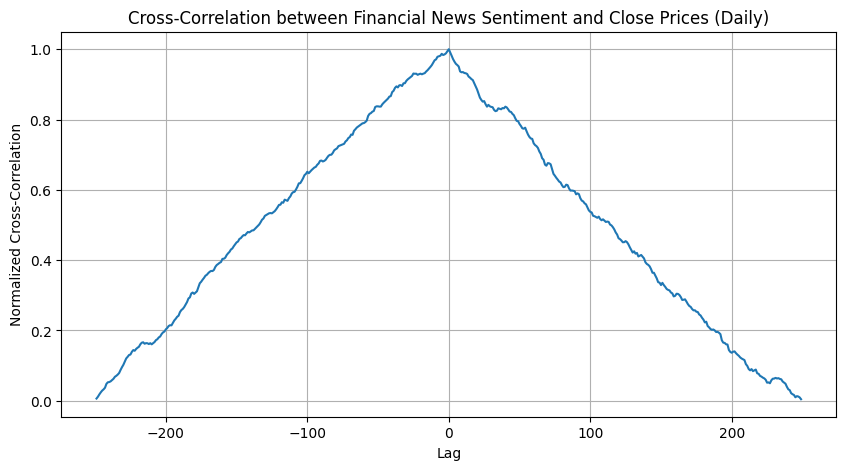

In [11]:
import numpy as np  
import matplotlib.pyplot as plt 

# Extracting sentiment scores and close prices as numpy arrays
sentiment_scores = merged_data['sentiment_score'].to_numpy()
close_prices = merged_data['Close'].to_numpy()

# Calculating cross-correlation between sentiment scores and close prices
cross_corr = np.correlate(sentiment_scores, close_prices, mode='full')

# Creating array of lag values corresponding to the cross-correlation
lags = np.arange(-len(sentiment_scores) + 1, len(sentiment_scores))

plt.figure(figsize=(10, 5))

# Plotting the cross-correlation, normalized to [-1, 1]
plt.plot(lags, cross_corr / np.max(np.abs(cross_corr)))

# Adding title and labels to the plot
plt.title('Cross-Correlation between Financial News Sentiment and Close Prices (Daily)')
plt.xlabel('Lag')
plt.ylabel('Normalized Cross-Correlation')

plt.grid(True)
plt.show()
